# DataJam v.3
By: Minchan Kim

Summary:
* Cleaned the original dataset so that it includes columns that are relevant to our study.
* Combined a shape file and our cleaned dataset to create a choropleth graph using the GeoPandas library.
* Combined another shape file and our cleaned dataset to create a dataframe that is workable with the matplotlib library.

## Import Statements:

Libraries used:
* Pandas allows us to work the dataset by changing it into a dataframe that is workable by Python.
* Numpy allows us to work with specific columns in the dataframe.
* Geopandas allows us to create geographical data from the pandas dataframes.
* Shapely allows the computer to create shapes so that we humans can view and interpret.
* Matplotlib allows the creation of lines to use in our shapely geometry and create visualizations.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.pyplot as plt

## Creating geospatial data using bluebird csv file:

read_csv() allows us to view txt/csv files as a dataframe so that we can work on it. "sep = '\t'" is used to tell Pandas that each column is separated by a tab, as seen in the txt file if opened.

In [2]:
bluebirds = pd.read_csv('files/ebd_wesblu_relJan-2023.txt', sep = '\t')
bluebirds

/var/folders/lt/n_z12_lx2cb6n9qf36pmd3x40000gn/T/ipykernel_5318/2310265845.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  bluebirds = pd.read_csv('files/ebd_wesblu_relJan-2023.txt', sep = '\t')


,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS814415280,2020-06-11 18:44:49,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,Birds observed during Biol. Survey of creek ju...,NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS99016899,2018-08-04 16:59:49,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS588525351,2021-08-25 13:22:36.120893,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,2.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS99333684,2010-10-05 18:42:18,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS99337960,2010-10-05 18:42:18,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,Species banded,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191468,URN:CornellLabOfOrnithology:EBIRD:OBS1597385029,2023-01-03 19:08:30.754098,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
1191469,URN:CornellLabOfOrnithology:EBIRD:OBS1598106209,2023-01-04 16:41:25.467741,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
1191470,URN:CornellLabOfOrnithology:EBIRD:OBS1604067962,2023-01-13 20:23:15.605589,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
1191471,URN:CornellLabOfOrnithology:EBIRD:OBS1601916069,2023-01-08 23:53:14.873517,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN


.columns lets us see all the columns within the dataframe. 

In [3]:
bluebirds.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS',
       'Unnamed: 49'],
      dtype='object')

Here, I get rid of all the columns that has any data missing.

In [4]:
columns_with_NaN = bluebirds.columns[bluebirds.isnull().any()]
bluebirds_cleaned = bluebirds.drop(columns = columns_with_NaN)
bluebirds_cleaned

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,COUNTRY,COUNTRY CODE,...,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,PROTOCOL CODE,PROJECT CODE,ALL SPECIES REPORTED,HAS MEDIA,APPROVED,REVIEWED
0,URN:CornellLabOfOrnithology:EBIRD:OBS814415280,2020-06-11 18:44:49,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,1,United States,US,...,1996-09-13,obsr209089,S60464547,Traveling,P22,EBIRD,1,0,1,0
1,URN:CornellLabOfOrnithology:EBIRD:OBS99016899,2018-08-04 16:59:49,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,X,United States,US,...,1985-06-23,obsr229232,S6933660,Historical,P62,EBIRD,0,0,1,0
2,URN:CornellLabOfOrnithology:EBIRD:OBS588525351,2021-08-25 13:22:36.120893,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,1,United States,US,...,1994-08-30,obsr1046705,S43698997,Traveling,P22,EBIRD,1,0,1,0
3,URN:CornellLabOfOrnithology:EBIRD:OBS99333684,2010-10-05 18:42:18,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,X,United States,US,...,1984-10-05,obsr231130,S6955732,Incidental,P20,EBIRD,0,0,1,0
4,URN:CornellLabOfOrnithology:EBIRD:OBS99337960,2010-10-05 18:42:18,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,X,United States,US,...,1994-05-22,obsr231130,S6956200,Incidental,P20,EBIRD,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191468,URN:CornellLabOfOrnithology:EBIRD:OBS1597385029,2023-01-03 19:08:30.754098,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,1,United States,US,...,2023-01-03,obsr2140819,S125354369,Stationary,P21,EBIRD,1,0,1,0
1191469,URN:CornellLabOfOrnithology:EBIRD:OBS1598106209,2023-01-04 16:41:25.467741,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,3,United States,US,...,2023-01-04,obsr993891,S125420681,Traveling,P22,EBIRD,1,0,1,0
1191470,URN:CornellLabOfOrnithology:EBIRD:OBS1604067962,2023-01-13 20:23:15.605589,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,2,United States,US,...,2023-01-11,obsr103620,S125956273,Traveling,P22,EBIRD,1,0,1,0
1191471,URN:CornellLabOfOrnithology:EBIRD:OBS1601916069,2023-01-08 23:53:14.873517,27545,species,avibase-AC2B812A,Western Bluebird,Sialia mexicana,1,United States,US,...,2023-01-08,obsr837550,S125756492,Traveling,P22,EBIRD,1,0,1,0


There's a lot of repeated data within columns in the dataset, so I get rid of the first batch here so that it doesn't take as long for pandas to work the dataframe.

In [5]:
nunique = bluebirds_cleaned.nunique()
cols_to_drop = nunique[nunique == 1].index
bluebirds_cleaned = bluebirds_cleaned.drop(cols_to_drop, axis=1)
bluebirds_cleaned

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,OBSERVATION COUNT,COUNTRY,COUNTRY CODE,STATE,STATE CODE,LOCALITY,LOCALITY ID,LOCALITY TYPE,...,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,PROTOCOL CODE,PROJECT CODE,ALL SPECIES REPORTED,HAS MEDIA,REVIEWED
0,URN:CornellLabOfOrnithology:EBIRD:OBS814415280,2020-06-11 18:44:49,1,United States,US,California,US-CA,"Coyote Creek, Casitas Dam",L10008291,P,...,-119.328706,1996-09-13,obsr209089,S60464547,Traveling,P22,EBIRD,1,0,0
1,URN:CornellLabOfOrnithology:EBIRD:OBS99016899,2018-08-04 16:59:49,X,United States,US,Washington,US-WA,wenas creek wildlife area,L1001027,P,...,-120.695801,1985-06-23,obsr229232,S6933660,Historical,P62,EBIRD,0,0,0
2,URN:CornellLabOfOrnithology:EBIRD:OBS588525351,2021-08-25 13:22:36.120893,1,United States,US,California,US-CA,Big Bear Lake--Grout Bay,L1001284,H,...,-116.944742,1994-08-30,obsr1046705,S43698997,Traveling,P22,EBIRD,1,0,0
3,URN:CornellLabOfOrnithology:EBIRD:OBS99333684,2010-10-05 18:42:18,X,United States,US,California,US-CA,Sierraville,L1003750,P,...,-120.366915,1984-10-05,obsr231130,S6955732,Incidental,P20,EBIRD,0,0,0
4,URN:CornellLabOfOrnithology:EBIRD:OBS99337960,2010-10-05 18:42:18,X,United States,US,California,US-CA,Knuthson Meadow,L1003756,P,...,-120.453376,1994-05-22,obsr231130,S6956200,Incidental,P20,EBIRD,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191468,URN:CornellLabOfOrnithology:EBIRD:OBS1597385029,2023-01-03 19:08:30.754098,1,United States,US,Arizona,US-AZ,LC Yard Birds,L13902271,P,...,-110.979438,2023-01-03,obsr2140819,S125354369,Stationary,P21,EBIRD,1,0,0
1191469,URN:CornellLabOfOrnithology:EBIRD:OBS1598106209,2023-01-04 16:41:25.467741,3,United States,US,California,US-CA,"1060 Crystal Ct, Walnut Creek US-CA 37.90743, ...",L14616781,P,...,-122.024008,2023-01-04,obsr993891,S125420681,Traveling,P22,EBIRD,1,0,0
1191470,URN:CornellLabOfOrnithology:EBIRD:OBS1604067962,2023-01-13 20:23:15.605589,2,United States,US,California,US-CA,Birdcage Park,L13354292,H,...,-118.104209,2023-01-11,obsr103620,S125956273,Traveling,P22,EBIRD,1,0,0
1191471,URN:CornellLabOfOrnithology:EBIRD:OBS1601916069,2023-01-08 23:53:14.873517,1,United States,US,California,US-CA,"Jim Green Trail, Atascadero",L12732248,H,...,-120.644748,2023-01-08,obsr837550,S125756492,Traveling,P22,EBIRD,1,0,0


Checking all the columns in the dataset again.

In [6]:
bluebirds_cleaned.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'OBSERVATION COUNT',
       'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'LOCALITY',
       'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE',
       'ALL SPECIES REPORTED', 'HAS MEDIA', 'REVIEWED'],
      dtype='object')

In the first few and last few rows, it seems as though the sightings are only in the US, so to see if it truly is only the US, I check the unique values in the COUNTRY column.

In [7]:
bluebirds_cleaned.get('COUNTRY').unique()

array(['United States', 'Mexico', 'Canada'], dtype=object)

Seeing that there are three countries in the dataframe, I take the first big step to get only data of bluebirds seen in California.

In [8]:
cali_only = bluebirds_cleaned[bluebirds_cleaned.get('STATE') == 'California']
cali_only

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,OBSERVATION COUNT,COUNTRY,COUNTRY CODE,STATE,STATE CODE,LOCALITY,LOCALITY ID,LOCALITY TYPE,...,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,PROTOCOL CODE,PROJECT CODE,ALL SPECIES REPORTED,HAS MEDIA,REVIEWED
0,URN:CornellLabOfOrnithology:EBIRD:OBS814415280,2020-06-11 18:44:49,1,United States,US,California,US-CA,"Coyote Creek, Casitas Dam",L10008291,P,...,-119.328706,1996-09-13,obsr209089,S60464547,Traveling,P22,EBIRD,1,0,0
2,URN:CornellLabOfOrnithology:EBIRD:OBS588525351,2021-08-25 13:22:36.120893,1,United States,US,California,US-CA,Big Bear Lake--Grout Bay,L1001284,H,...,-116.944742,1994-08-30,obsr1046705,S43698997,Traveling,P22,EBIRD,1,0,0
3,URN:CornellLabOfOrnithology:EBIRD:OBS99333684,2010-10-05 18:42:18,X,United States,US,California,US-CA,Sierraville,L1003750,P,...,-120.366915,1984-10-05,obsr231130,S6955732,Incidental,P20,EBIRD,0,0,0
4,URN:CornellLabOfOrnithology:EBIRD:OBS99337960,2010-10-05 18:42:18,X,United States,US,California,US-CA,Knuthson Meadow,L1003756,P,...,-120.453376,1994-05-22,obsr231130,S6956200,Incidental,P20,EBIRD,0,0,0
5,URN:CornellLabOfOrnithology:EBIRD:OBS99336855,2018-08-02 22:08:10,6,United States,US,California,US-CA,Sierra Valley (Plumas County),L1003763,P,...,-120.381386,1993-03-13,obsr231130,S6956100,Incidental,P20,EBIRD,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191465,URN:CornellLabOfOrnithology:EBIRD:OBS1599646904,2023-01-06 17:20:10.103227,2,United States,US,California,US-CA,Lakeland Drive,L3318874,P,...,-121.159759,2023-01-06,obsr91624,S125556529,Stationary,P21,EBIRD,1,0,0
1191469,URN:CornellLabOfOrnithology:EBIRD:OBS1598106209,2023-01-04 16:41:25.467741,3,United States,US,California,US-CA,"1060 Crystal Ct, Walnut Creek US-CA 37.90743, ...",L14616781,P,...,-122.024008,2023-01-04,obsr993891,S125420681,Traveling,P22,EBIRD,1,0,0
1191470,URN:CornellLabOfOrnithology:EBIRD:OBS1604067962,2023-01-13 20:23:15.605589,2,United States,US,California,US-CA,Birdcage Park,L13354292,H,...,-118.104209,2023-01-11,obsr103620,S125956273,Traveling,P22,EBIRD,1,0,0
1191471,URN:CornellLabOfOrnithology:EBIRD:OBS1601916069,2023-01-08 23:53:14.873517,1,United States,US,California,US-CA,"Jim Green Trail, Atascadero",L12732248,H,...,-120.644748,2023-01-08,obsr837550,S125756492,Traveling,P22,EBIRD,1,0,0


Getting unique values again.

In [9]:
nunique = cali_only.nunique()
cols_to_drop = nunique[nunique == 1].index
cali_cleaned = cali_only.drop(cols_to_drop, axis=1)
cali_cleaned

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,OBSERVATION COUNT,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,PROTOCOL CODE,PROJECT CODE,ALL SPECIES REPORTED,HAS MEDIA,REVIEWED
0,URN:CornellLabOfOrnithology:EBIRD:OBS814415280,2020-06-11 18:44:49,1,"Coyote Creek, Casitas Dam",L10008291,P,34.367339,-119.328706,1996-09-13,obsr209089,S60464547,Traveling,P22,EBIRD,1,0,0
2,URN:CornellLabOfOrnithology:EBIRD:OBS588525351,2021-08-25 13:22:36.120893,1,Big Bear Lake--Grout Bay,L1001284,H,34.263051,-116.944742,1994-08-30,obsr1046705,S43698997,Traveling,P22,EBIRD,1,0,0
3,URN:CornellLabOfOrnithology:EBIRD:OBS99333684,2010-10-05 18:42:18,X,Sierraville,L1003750,P,39.589458,-120.366915,1984-10-05,obsr231130,S6955732,Incidental,P20,EBIRD,0,0,0
4,URN:CornellLabOfOrnithology:EBIRD:OBS99337960,2010-10-05 18:42:18,X,Knuthson Meadow,L1003756,P,39.698216,-120.453376,1994-05-22,obsr231130,S6956200,Incidental,P20,EBIRD,0,0,0
5,URN:CornellLabOfOrnithology:EBIRD:OBS99336855,2018-08-02 22:08:10,6,Sierra Valley (Plumas County),L1003763,P,39.729528,-120.381386,1993-03-13,obsr231130,S6956100,Incidental,P20,EBIRD,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191465,URN:CornellLabOfOrnithology:EBIRD:OBS1599646904,2023-01-06 17:20:10.103227,2,Lakeland Drive,L3318874,P,38.747892,-121.159759,2023-01-06,obsr91624,S125556529,Stationary,P21,EBIRD,1,0,0
1191469,URN:CornellLabOfOrnithology:EBIRD:OBS1598106209,2023-01-04 16:41:25.467741,3,"1060 Crystal Ct, Walnut Creek US-CA 37.90743, ...",L14616781,P,37.907434,-122.024008,2023-01-04,obsr993891,S125420681,Traveling,P22,EBIRD,1,0,0
1191470,URN:CornellLabOfOrnithology:EBIRD:OBS1604067962,2023-01-13 20:23:15.605589,2,Birdcage Park,L13354292,H,33.830311,-118.104209,2023-01-11,obsr103620,S125956273,Traveling,P22,EBIRD,1,0,0
1191471,URN:CornellLabOfOrnithology:EBIRD:OBS1601916069,2023-01-08 23:53:14.873517,1,"Jim Green Trail, Atascadero",L12732248,H,35.481798,-120.644748,2023-01-08,obsr837550,S125756492,Traveling,P22,EBIRD,1,0,0


Not sure why, but there are still some columns that are still repeating and a few of these are unneeded for our analysis so it gets taken out to allow pandas to run faster.

In [10]:
unneeded_cols = ['PROTOCOL CODE', 'PROJECT CODE', 'ALL SPECIES REPORTED', 'HAS MEDIA', 'REVIEWED']
cali_cleaned = cali_cleaned.drop(columns = unneeded_cols)
cali_cleaned

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,OBSERVATION COUNT,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE
0,URN:CornellLabOfOrnithology:EBIRD:OBS814415280,2020-06-11 18:44:49,1,"Coyote Creek, Casitas Dam",L10008291,P,34.367339,-119.328706,1996-09-13,obsr209089,S60464547,Traveling
2,URN:CornellLabOfOrnithology:EBIRD:OBS588525351,2021-08-25 13:22:36.120893,1,Big Bear Lake--Grout Bay,L1001284,H,34.263051,-116.944742,1994-08-30,obsr1046705,S43698997,Traveling
3,URN:CornellLabOfOrnithology:EBIRD:OBS99333684,2010-10-05 18:42:18,X,Sierraville,L1003750,P,39.589458,-120.366915,1984-10-05,obsr231130,S6955732,Incidental
4,URN:CornellLabOfOrnithology:EBIRD:OBS99337960,2010-10-05 18:42:18,X,Knuthson Meadow,L1003756,P,39.698216,-120.453376,1994-05-22,obsr231130,S6956200,Incidental
5,URN:CornellLabOfOrnithology:EBIRD:OBS99336855,2018-08-02 22:08:10,6,Sierra Valley (Plumas County),L1003763,P,39.729528,-120.381386,1993-03-13,obsr231130,S6956100,Incidental
...,...,...,...,...,...,...,...,...,...,...,...,...
1191465,URN:CornellLabOfOrnithology:EBIRD:OBS1599646904,2023-01-06 17:20:10.103227,2,Lakeland Drive,L3318874,P,38.747892,-121.159759,2023-01-06,obsr91624,S125556529,Stationary
1191469,URN:CornellLabOfOrnithology:EBIRD:OBS1598106209,2023-01-04 16:41:25.467741,3,"1060 Crystal Ct, Walnut Creek US-CA 37.90743, ...",L14616781,P,37.907434,-122.024008,2023-01-04,obsr993891,S125420681,Traveling
1191470,URN:CornellLabOfOrnithology:EBIRD:OBS1604067962,2023-01-13 20:23:15.605589,2,Birdcage Park,L13354292,H,33.830311,-118.104209,2023-01-11,obsr103620,S125956273,Traveling
1191471,URN:CornellLabOfOrnithology:EBIRD:OBS1601916069,2023-01-08 23:53:14.873517,1,"Jim Green Trail, Atascadero",L12732248,H,35.481798,-120.644748,2023-01-08,obsr837550,S125756492,Traveling


Convert the longitude and latitude data to points that the computer can work with.

In [11]:
bluebird_points = cali_cleaned.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis = 1)
bluebird_points

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


0           POINT (-119.328706 34.3673389)
2          POINT (-116.9447422 34.2630511)
3          POINT (-120.3669148 39.5894584)
4          POINT (-120.4533763 39.6982157)
5           POINT (-120.3813858 39.729528)
                        ...               
1191465    POINT (-121.1597586 38.7478916)
1191469      POINT (-122.024008 37.907434)
1191470    POINT (-118.1042092 33.8303109)
1191471    POINT (-120.6447481 35.4817977)
1191472    POINT (-118.4070394 34.0581261)
Length: 767352, dtype: object

In [12]:
cali_bluebird_points = gpd.GeoDataFrame(cali_cleaned, geometry = bluebird_points)
#makes geometry into latitude and longitude.
cali_bluebird_points = cali_bluebird_points.set_crs(epsg=4269)
cali_bluebird_points.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,OBSERVATION COUNT,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,geometry
0,URN:CornellLabOfOrnithology:EBIRD:OBS814415280,2020-06-11 18:44:49,1,"Coyote Creek, Casitas Dam",L10008291,P,34.367339,-119.328706,1996-09-13,obsr209089,S60464547,Traveling,POINT (-119.32871 34.36734)
2,URN:CornellLabOfOrnithology:EBIRD:OBS588525351,2021-08-25 13:22:36.120893,1,Big Bear Lake--Grout Bay,L1001284,H,34.263051,-116.944742,1994-08-30,obsr1046705,S43698997,Traveling,POINT (-116.94474 34.26305)
3,URN:CornellLabOfOrnithology:EBIRD:OBS99333684,2010-10-05 18:42:18,X,Sierraville,L1003750,P,39.589458,-120.366915,1984-10-05,obsr231130,S6955732,Incidental,POINT (-120.36691 39.58946)
4,URN:CornellLabOfOrnithology:EBIRD:OBS99337960,2010-10-05 18:42:18,X,Knuthson Meadow,L1003756,P,39.698216,-120.453376,1994-05-22,obsr231130,S6956200,Incidental,POINT (-120.45338 39.69822)
5,URN:CornellLabOfOrnithology:EBIRD:OBS99336855,2018-08-02 22:08:10,6,Sierra Valley (Plumas County),L1003763,P,39.729528,-120.381386,1993-03-13,obsr231130,S6956100,Incidental,POINT (-120.38139 39.72953)


A fascinating view of all the data:

(-124.91084752500001, -113.621447975, 32.067414745, 42.474892155)

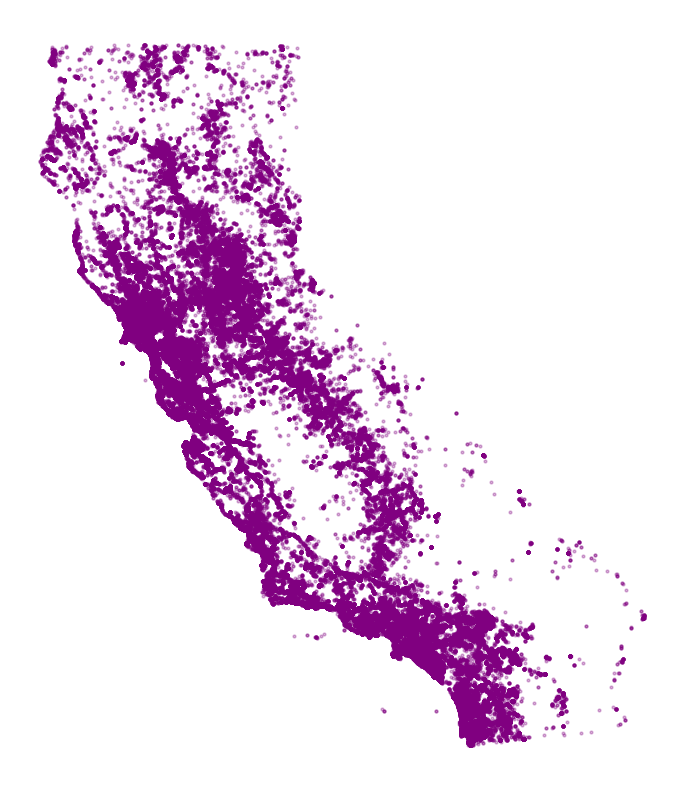

In [13]:
cali_bluebird_points.plot(figsize = (10, 10), color = 'purple', markersize = 4, alpha = .3).axis('off')

## Experimenting with the California .shp file:

In [14]:
cali_shape = gpd.read_file("files/cali/tl_2019_06_cousub.shp")
cali_shape

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,None,None,None,S,437896246,30572097,+37.8911457,-120.4661538,"POLYGON ((-120.65327 37.83205, -120.65324 37.8..."
1,06,109,93470,01935352,0610993470,Twain Harte-Tuolumne City,Twain Harte-Tuolumne City CCD,22,Z5,G4040,None,None,None,S,4691063878,66568242,+38.0406457,-119.8372726,"POLYGON ((-120.50044 38.00665, -120.50032 38.0..."
2,06,077,90900,01935094,0607790900,Escalon,Escalon CCD,22,Z5,G4040,None,None,None,S,249249223,1708049,+37.8263541,-121.0207159,"POLYGON ((-121.14725 37.90501, -121.14656 37.9..."
3,06,077,91690,01935174,0607791690,Lockeford,Lockeford CCD,22,Z5,G4040,None,None,None,S,487542715,10053409,+38.1601025,-121.0870549,"POLYGON ((-121.21532 38.13784, -121.21074 38.1..."
4,06,077,91700,01935175,0607791700,Lodi,Lodi CCD,22,Z5,G4040,None,None,None,S,326663642,3218274,+38.1500242,-121.2907480,"POLYGON ((-121.41099 38.23198, -121.41092 38.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,06,097,93070,01935312,0609793070,Sonoma,Sonoma CCD,22,Z5,G4040,None,None,None,S,377452479,36015546,+38.2712625,-122.4652549,"POLYGON ((-122.63053 38.38709, -122.63052 38.3..."
393,06,045,91030,01935107,0604591030,Fort Bragg,Fort Bragg CCD,22,Z5,G4040,None,None,None,S,487989480,96638850,+39.4689165,-123.6955963,"POLYGON ((-123.88851 39.41942, -123.88785 39.4..."
394,06,045,92510,01935256,0604592510,Point Arena,Point Arena CCD,22,Z5,G4040,None,None,None,S,834001490,282954911,+38.9140091,-123.5449000,"POLYGON ((-123.80986 38.96122, -123.80607 38.9..."
395,06,045,93740,01935380,0604593740,Willits,Willits CCD,22,Z5,G4040,None,None,None,S,767204455,1805188,+39.4457225,-123.3642436,"POLYGON ((-123.56907 39.34193, -123.56893 39.3..."


<AxesSubplot:>

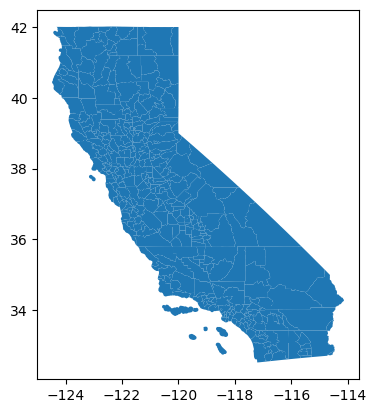

In [15]:
cali_shape.plot()

In [16]:
cali_shape.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Parts of coloring shapes:
1. fill - inside part
2. stroke/line/edge - outline around our shape

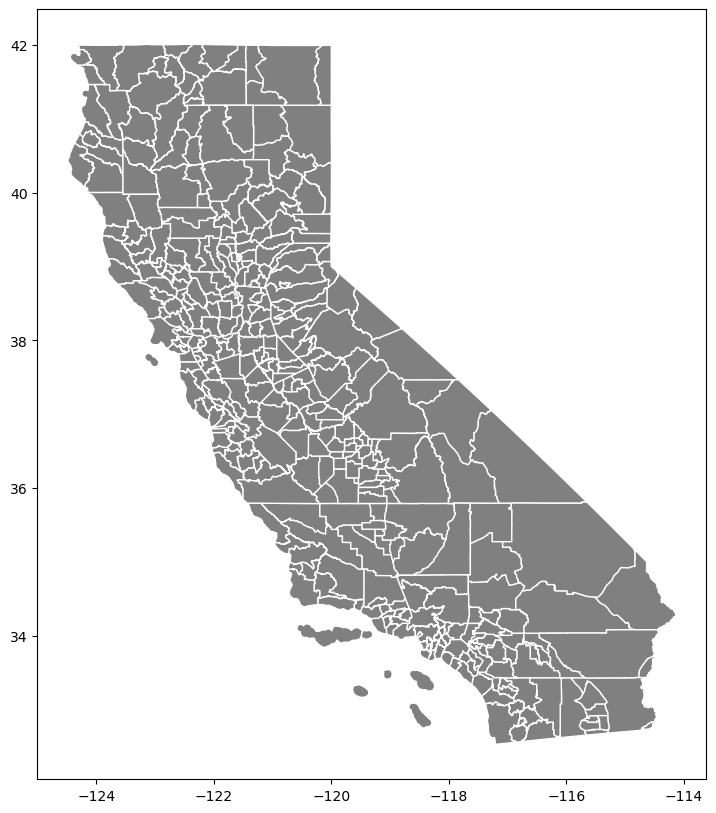

In [17]:
cali_shape.set_crs(epsg=4269)
cali_resize = cali_shape.plot(figsize = (10,10), color = 'grey', edgecolor = 'white')

## Creating the choropleth:

Joining the california shape file and the points we created from the bluebird dataset.

In [18]:
joined = gpd.sjoin(cali_shape, cali_bluebird_points, how = 'inner', predicate = 'contains')
joined

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,OBSERVATION COUNT,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,4,"21164 Lyons Bald Mountain Rd, Sonora US-CA (38...",L8405059,P,38.006810,-120.349690,2019-01-10,obsr763128,S51541016,Stationary
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,2,"195 Banner Drive, Sonora CA 95370",L11405885,P,37.999189,-120.391068,2020-05-09,obsr1704458,S68804862,Incidental
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,2,Westfall Home,L1534426,P,37.999659,-120.390149,2013-04-09,obsr296961,S13694409,Stationary
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,X,Sonora--Lyons Bald Mountain Rd.,L1511518,P,38.000982,-120.355128,2005-02-06,obsr167174,S10543510,Incidental
0,06,109,93080,01935313,0610993080,Sonora,Sonora CCD,22,Z5,G4040,...,X,Sonora--Lyons Bald Mountain Rd.,L1511518,P,38.000982,-120.355128,2005-02-06,obsr107968,S10543271,Incidental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,06,109,91190,01935124,0610991190,Groveland,Groveland CCD,22,Z5,G4040,...,3,Don Pedro Reservoir--south arm,L2038399,H,37.686537,-120.349045,2020-03-10,obsr763128,S65662777,Traveling
396,06,109,91190,01935124,0610991190,Groveland,Groveland CCD,22,Z5,G4040,...,3,Don Pedro Reservoir--south arm,L2038399,H,37.686537,-120.349045,2023-01-17,obsr203282,S126405955,Traveling
396,06,109,91190,01935124,0610991190,Groveland,Groveland CCD,22,Z5,G4040,...,1,Don Pedro Reservoir--south arm,L2038399,H,37.686537,-120.349045,2020-03-08,obsr215766,S65632877,Traveling
396,06,109,91190,01935124,0610991190,Groveland,Groveland CCD,22,Z5,G4040,...,3,Don Pedro Reservoir--south arm,L2038399,H,37.686537,-120.349045,2022-11-19,obsr1213528,S122685376,Traveling


In [19]:
administrative_regions = cali_shape.set_index('NAME')[['geometry']]
administrative_regions

,geometry
NAME,
Sonora,"POLYGON ((-120.65327 37.83205, -120.65324 37.8..."
Twain Harte-Tuolumne City,"POLYGON ((-120.50044 38.00665, -120.50032 38.0..."
Escalon,"POLYGON ((-121.14725 37.90501, -121.14656 37.9..."
Lockeford,"POLYGON ((-121.21532 38.13784, -121.21074 38.1..."
Lodi,"POLYGON ((-121.41099 38.23198, -121.41092 38.2..."
...,...
Sonoma,"POLYGON ((-122.63053 38.38709, -122.63052 38.3..."
Fort Bragg,"POLYGON ((-123.88851 39.41942, -123.88785 39.4..."
Point Arena,"POLYGON ((-123.80986 38.96122, -123.80607 38.9..."


In [20]:
administrative_regions['count'] = joined['NAME'].value_counts()
administrative_regions

,geometry,count
NAME,,
Sonora,"POLYGON ((-120.65327 37.83205, -120.65324 37.8...",2445.0
Twain Harte-Tuolumne City,"POLYGON ((-120.50044 38.00665, -120.50032 38.0...",1056.0
Escalon,"POLYGON ((-121.14725 37.90501, -121.14656 37.9...",107.0
Lockeford,"POLYGON ((-121.21532 38.13784, -121.21074 38.1...",1095.0
Lodi,"POLYGON ((-121.41099 38.23198, -121.41092 38.2...",1504.0
...,...,...
Sonoma,"POLYGON ((-122.63053 38.38709, -122.63052 38.3...",3864.0
Fort Bragg,"POLYGON ((-123.88851 39.41942, -123.88785 39.4...",314.0
Point Arena,"POLYGON ((-123.80986 38.96122, -123.80607 38.9...",332.0


<AxesSubplot:>

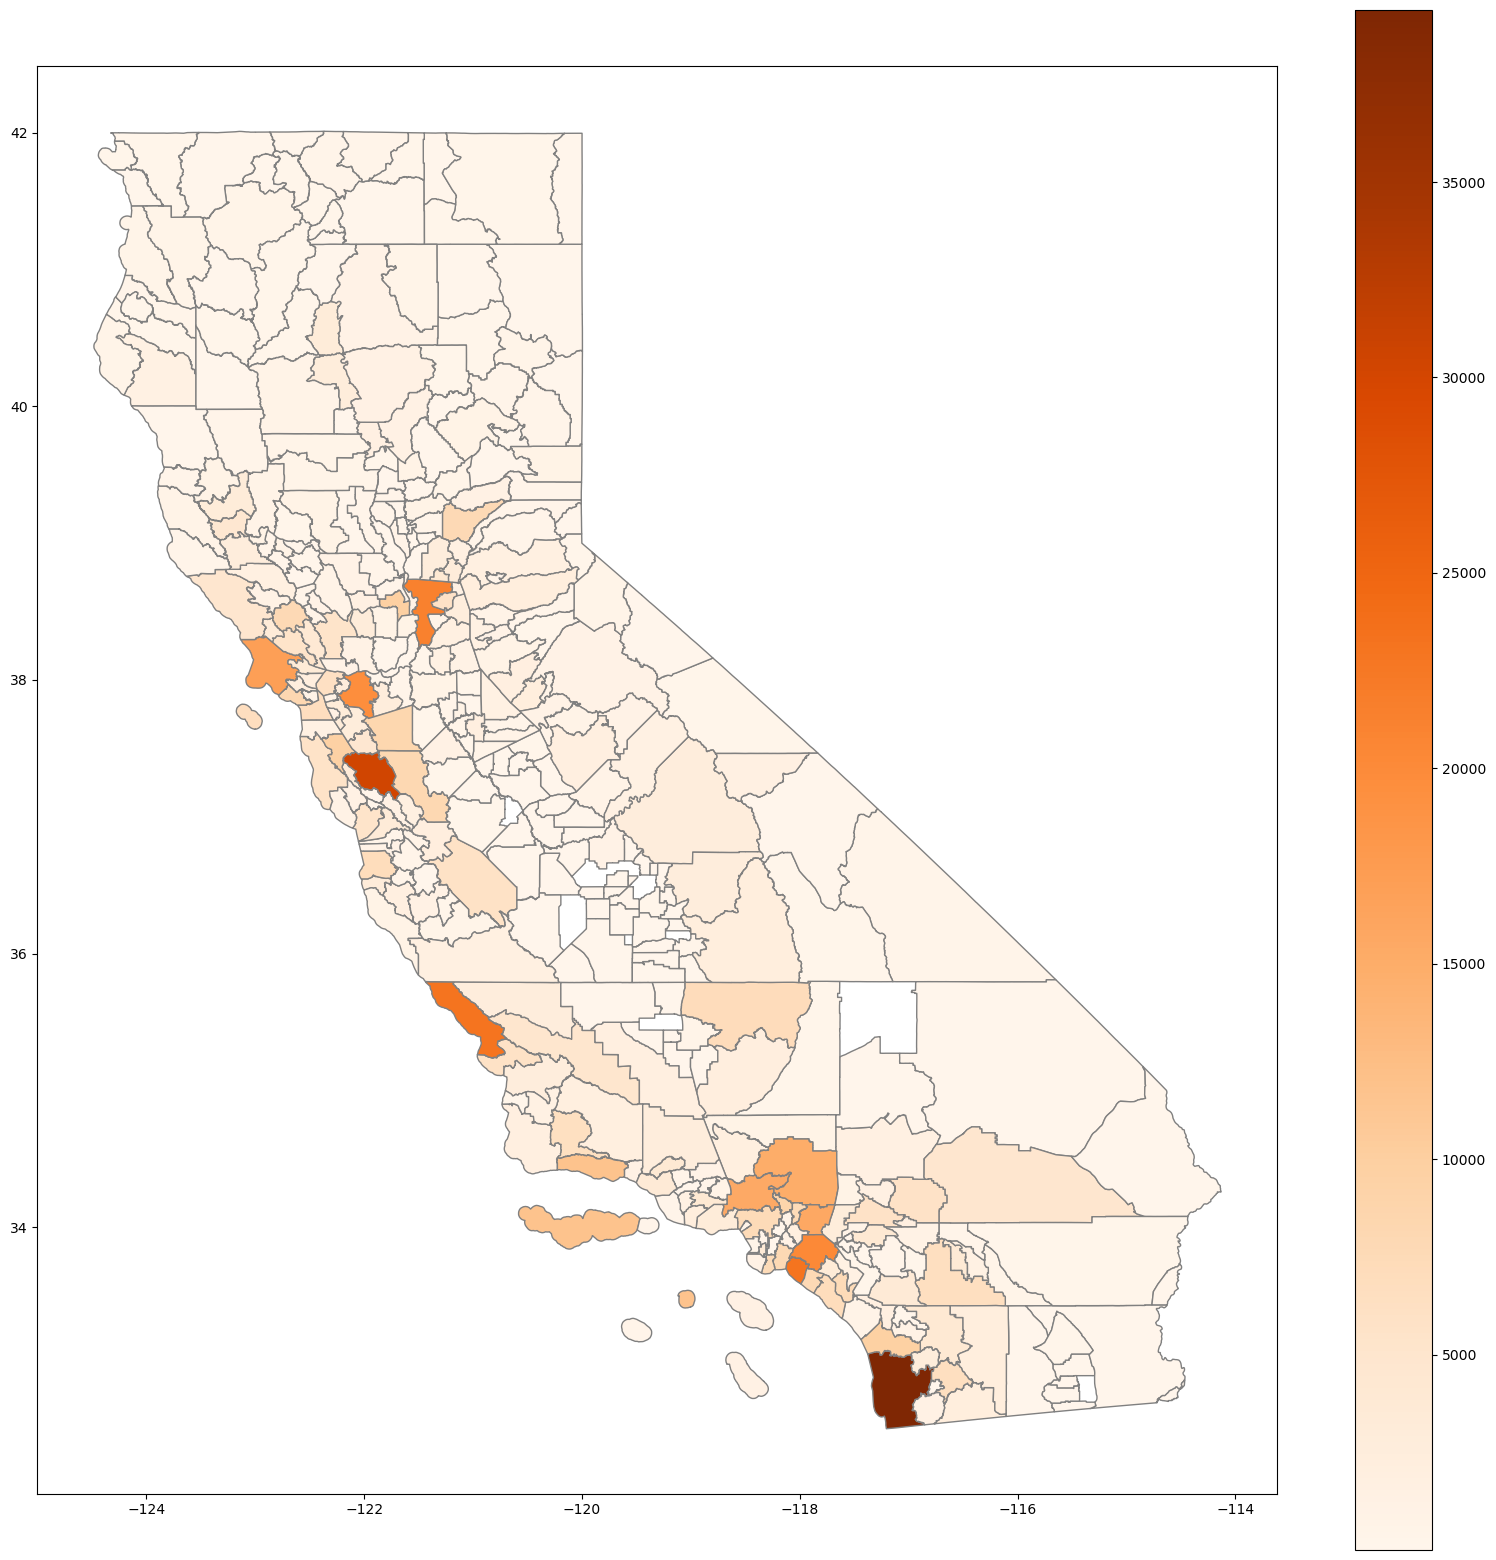

In [21]:
administrative_regions.plot(column = 'count', cmap = 'Oranges', legend = True, figsize = (20, 20), edgecolor = 'grey')

## Creating pie and bar charts:

Bringing in shape file that contains Californian counties and their respective locations.

In [22]:
cali_counties = gpd.read_file("files/cali_counties/GU_CountyOrEquivalent.shp")
cali_counties

,permanent_,source_fea,source_dat,source_d_1,source_ori,loaddate,fcode,state_fips,state_name,county_fip,county_nam,stco_fipsc,population,areasqkm,gnis_id,gnis_name,shape_Leng,shape_Area,ObjectID,geometry
0,2ecca5eb-4b3b-44af-b911-d79f83646360,06005,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,005,Amador,06005,38091,1569.404272,1675841,Amador County,2.909838,0.161954,1,"POLYGON ((-121.02728 38.48083, -121.02729 38.4..."
1,325057ad-a779-4adb-8fb6-482cfdc5e35f,06043,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,043,Mariposa,06043,18251,3788.698097,277286,Mariposa County,3.445665,0.386464,2,"POLYGON ((-120.32153 37.52440, -120.32156 37.5..."
2,47565a4a-e485-4f09-ba3b-5eb89c76db5e,06021,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,021,Glenn,06021,28122,3436.853966,277275,Glenn County,3.298081,0.360397,3,"POLYGON ((-122.89094 39.64487, -122.89134 39.6..."
3,b1169894-dfc7-4791-a19b-661809f0f979,06047,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,047,Merced,06047,255793,5124.685101,277288,Merced County,3.562062,0.520078,4,"POLYGON ((-120.68159 37.51863, -120.67691 37.5..."
4,dea1d699-dfbd-42f2-a0e0-8f01e2e7c390,06027,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,027,Inyo,06027,18546,26488.066907,1804637,Inyo County,8.873948,2.664786,5,"POLYGON ((-118.33758 36.65480, -118.33773 36.6..."
5,d6ad8af8-f794-4c5a-b9d9-19b9d9fb6fd4,06091,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,091,Sierra,06091,3240,2491.993877,277310,Sierra County,3.064187,0.261249,6,"POLYGON ((-120.65559 39.69356, -120.65552 39.6..."
6,30cf8dc7-1838-41ef-be02-08573778ce5a,06053,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,053,Monterey,06053,415057,9767.416195,277291,Monterey County,6.095662,0.979253,7,"POLYGON ((-122.02681 36.54640, -122.02702 36.5..."
7,45f12090-1bd7-4eef-b7c1-0f12e31227a7,06099,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,099,Stanislaus,06099,514453,3921.019461,277314,Stanislaus County,3.853531,0.399844,8,"POLYGON ((-120.92225 37.73747, -120.92159 37.7..."
8,5a498dde-eef1-4ca5-8c14-e824bd03c6e9,06025,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,025,Imperial,06025,174528,11604.813003,277277,Imperial County,5.036273,1.120184,9,"POLYGON ((-114.72652 32.71827, -114.72663 32.7..."
9,dbc261a8-fb48-4c69-90c7-1a579ed85862,06037,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,037,Los Angeles,06037,9818605,12300.992961,277283,Los Angeles County,7.285474,1.203189,10,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."


Joining Californian counties and the bluebird data.

In [23]:
county_joined = gpd.sjoin(cali_counties, cali_bluebird_points, how = 'inner', predicate = 'contains')
county_joined

,permanent_,source_fea,source_dat,source_d_1,source_ori,loaddate,fcode,state_fips,state_name,county_fip,...,OBSERVATION COUNT,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE
0,2ecca5eb-4b3b-44af-b911-d79f83646360,06005,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,005,...,5,"95689, Volcano US-CA 38.45165, -120.61573",L21016838,P,38.451651,-120.615730,2022-09-22,obsr1483700,S119457396,Traveling
0,2ecca5eb-4b3b-44af-b911-d79f83646360,06005,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,005,...,6,"95689, Volcano US-CA 38.45207, -120.61542",L11332569,P,38.452066,-120.615420,2022-10-19,obsr1483700,S121292351,Traveling
0,2ecca5eb-4b3b-44af-b911-d79f83646360,06005,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,005,...,3,"95689, Volcano US-CA 38.45207, -120.61542",L11332569,P,38.452066,-120.615420,2021-06-19,obsr1483700,S116206690,Traveling
0,2ecca5eb-4b3b-44af-b911-d79f83646360,06005,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,005,...,4,"95689, Volcano US-CA 38.45207, -120.61542",L11332569,P,38.452066,-120.615420,2022-10-18,obsr1483700,S120892991,Traveling
0,2ecca5eb-4b3b-44af-b911-d79f83646360,06005,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,005,...,2,"95689, Volcano US-CA 38.45213, -120.61572",L17986782,P,38.452131,-120.615722,2022-02-10,obsr1483700,S104086340,Traveling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,515f7cc1-b6b4-4219-84b7-829109552469,06041,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,041,...,6,Stinson Beach,L591433,H,37.896336,-122.639244,2019-11-09,obsr235779,S61309001,Traveling
57,515f7cc1-b6b4-4219-84b7-829109552469,06041,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,041,...,3,Stinson Beach,L591433,H,37.896336,-122.639244,2019-09-25,obsr1016062,S60110371,Traveling
57,515f7cc1-b6b4-4219-84b7-829109552469,06041,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,041,...,9,Stinson Beach,L591433,H,37.896336,-122.639244,2017-09-23,obsr432471,S39430813,Traveling
57,515f7cc1-b6b4-4219-84b7-829109552469,06041,862682ca-fbab-4d47-a9ef-6cd9a0d16f14,"2020 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,2021-06-02,61200,06,California,041,...,2,Stinson Beach,L591433,H,37.896336,-122.639244,2022-09-05,obsr637946,S118190885,Traveling


Rudimentary counting of sightings.

In [24]:
counties_count = county_joined.groupby('county_nam').count()
counties_count

,permanent_,source_fea,source_dat,source_d_1,source_ori,loaddate,fcode,state_fips,state_name,county_fip,...,OBSERVATION COUNT,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE
county_nam,,,,,,,,,,,,,,,,,,,,,
Alameda,21254,21254,21254,21254,21254,21254,21254,21254,21254,21254,...,21254,21254,21254,21254,21254,21254,21254,21254,21254,21254
Alpine,514,514,514,514,514,514,514,514,514,514,...,514,514,514,514,514,514,514,514,514,514
Amador,3429,3429,3429,3429,3429,3429,3429,3429,3429,3429,...,3429,3429,3429,3429,3429,3429,3429,3429,3429,3429
Butte,4598,4598,4598,4598,4598,4598,4598,4598,4598,4598,...,4598,4598,4598,4598,4598,4598,4598,4598,4598,4598
Calaveras,2948,2948,2948,2948,2948,2948,2948,2948,2948,2948,...,2948,2948,2948,2948,2948,2948,2948,2948,2948,2948
Colusa,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,...,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386
Contra Costa,31690,31690,31690,31690,31690,31690,31690,31690,31690,31690,...,31690,31690,31690,31690,31690,31690,31690,31690,31690,31690
Del Norte,415,415,415,415,415,415,415,415,415,415,...,415,415,415,415,415,415,415,415,415,415
El Dorado,4813,4813,4813,4813,4813,4813,4813,4813,4813,4813,...,4813,4813,4813,4813,4813,4813,4813,4813,4813,4813


In [25]:
socal_counties = ['San Luis Obispo', 'Kern', 'Santa Barbara',
                  'Ventura', 'Los Angeles', 'San Bernardino', 'Orange',
                  'Riverside', 'San Diego', 'Imperial']
socal = counties_count.loc[socal_counties]
socal

,permanent_,source_fea,source_dat,source_d_1,source_ori,loaddate,fcode,state_fips,state_name,county_fip,...,OBSERVATION COUNT,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE
county_nam,,,,,,,,,,,,,,,,,,,,,
San Luis Obispo,22604,22604,22604,22604,22604,22604,22604,22604,22604,22604,...,22604,22604,22604,22604,22604,22604,22604,22604,22604,22604
Kern,12329,12329,12329,12329,12329,12329,12329,12329,12329,12329,...,12329,12329,12329,12329,12329,12329,12329,12329,12329,12329
Santa Barbara,25012,25012,25012,25012,25012,25012,25012,25012,25012,25012,...,25012,25012,25012,25012,25012,25012,25012,25012,25012,25012
Ventura,21250,21250,21250,21250,21250,21250,21250,21250,21250,21250,...,21250,21250,21250,21250,21250,21250,21250,21250,21250,21250
Los Angeles,93964,93964,93964,93964,93964,93964,93964,93964,93964,93964,...,93964,93964,93964,93964,93964,93964,93964,93964,93964,93964
San Bernardino,25594,25594,25594,25594,25594,25594,25594,25594,25594,25594,...,25594,25594,25594,25594,25594,25594,25594,25594,25594,25594
Orange,63946,63946,63946,63946,63946,63946,63946,63946,63946,63946,...,63946,63946,63946,63946,63946,63946,63946,63946,63946,63946
Riverside,23608,23608,23608,23608,23608,23608,23608,23608,23608,23608,...,23608,23608,23608,23608,23608,23608,23608,23608,23608,23608
San Diego,72851,72851,72851,72851,72851,72851,72851,72851,72851,72851,...,72851,72851,72851,72851,72851,72851,72851,72851,72851,72851


Pie chart created with pandas library:

<AxesSubplot:ylabel='fcode'>

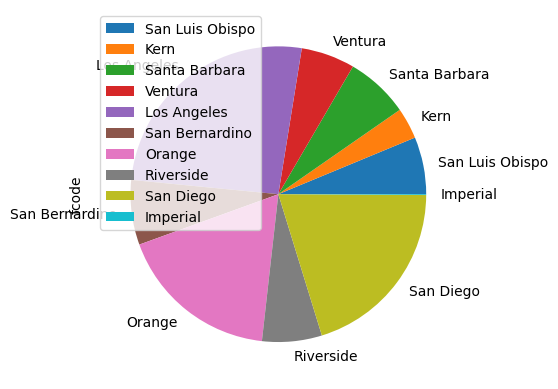

In [26]:
socal.plot.pie(y = 'fcode')

In [27]:
socal_matplot = socal.reset_index()

Pie chart created with matplotlib library:

([<matplotlib.patches.Wedge at 0x7fabfbff4dc0>,
 [Text(1.0788431737495072, 0.21470306577711157, 'San Luis Obispo'),
  Text(0.9653199420123914, 0.527406304051434, 'Kern'),
  Text(0.7467674394837156, 0.8076746816181225, 'Santa Barbara'),
  Text(0.37117159852013226, 1.035486187475241, 'Ventura'),
  Text(-0.6719159567369631, 0.8709356733319927, 'Los Angeles'),
  Text(-1.091367428446612, -0.1375395802154033, 'San Bernardino'),
  Text(-0.6807218237067907, -0.8640704825008786, 'Orange'),
  Text(0.10286143628637934, -1.0951801335511449, 'Riverside'),
  Text(0.883061396256122, -0.6558982927574888, 'San Diego'),
  Text(1.099995503786492, -0.0031450992833041975, 'Imperial')])

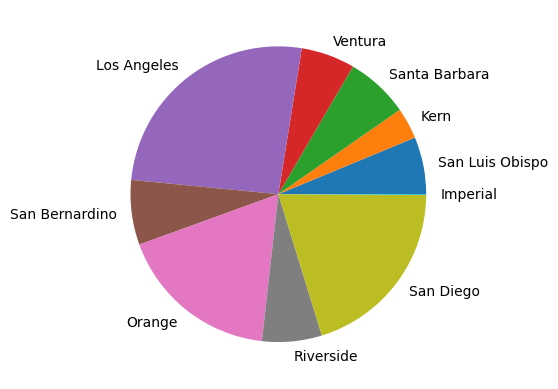

In [28]:
plt.pie(socal_matplot["fcode"], labels = socal_matplot["county_nam"])

([<matplotlib.patches.Wedge at 0x7fabfc552730>,
 [Text(1.0788431737495072, 0.21470306577711157, 'San Luis Obispo'),
  Text(0.9653199420123914, 0.527406304051434, 'Kern'),
  Text(0.7467674394837156, 0.8076746816181225, 'Santa Barbara'),
  Text(0.37117159852013226, 1.035486187475241, 'Ventura'),
  Text(-0.6719159567369631, 0.8709356733319927, 'Los Angeles'),
  Text(-1.091367428446612, -0.1375395802154033, 'San Bernardino'),
  Text(-0.6807218237067907, -0.8640704825008786, 'Orange'),
  Text(0.10286143628637934, -1.0951801335511449, 'Riverside'),
  Text(0.883061396256122, -0.6558982927574888, 'San Diego'),
  Text(1.099995503786492, -0.0031450992833041975, 'Imperial')],
 [Text(0.5884599129542766, 0.11711076315115174, '6.3%'),
  Text(0.5265381501885771, 0.2876761658462367, '3.4%'),
  Text(0.4073276942638448, 0.44054982633715767, '6.9%'),
  Text(0.20245723555643574, 0.5648106477137678, '5.9%'),
  Text(-0.3664996127656162, 0.47505582181745054, '26.0%'),
  Text(-0.5952913246072429, -0.075021589

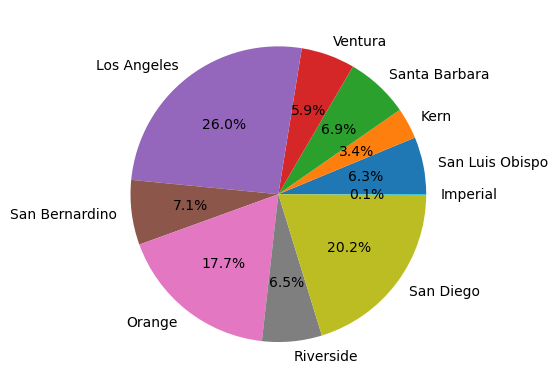

In [29]:
plt.pie(socal_matplot["fcode"], labels = socal_matplot["county_nam"], autopct='%1.1f%%')

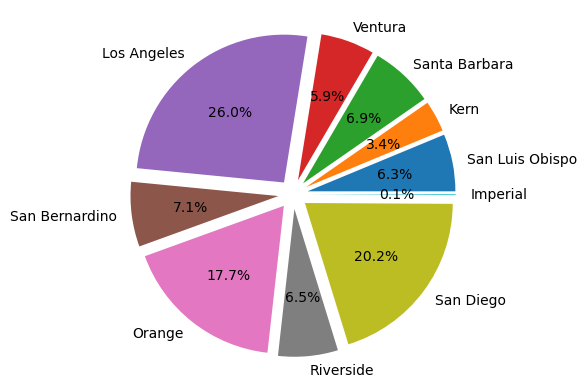

In [30]:
explode = np.array([.1, .1, .1, .1, .1, .1, .1, .1, .1, .1])

plt.pie(socal_matplot["fcode"], explode=explode, labels = socal_matplot["county_nam"], autopct='%1.1f%%')
plt.show()

Bar chart with pandas library:

<AxesSubplot:xlabel='county_nam'>

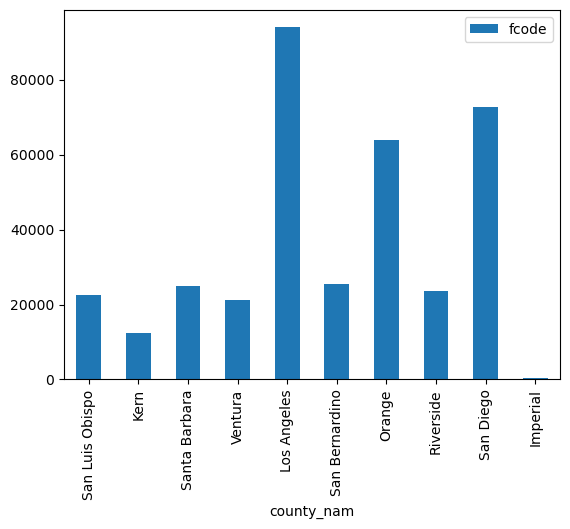

In [31]:
socal.plot.bar(y = 'fcode')